# CS765 PROJECT

### Demo from https://github.com/Axelrod-Python/Axelrod

In [1]:
# install the requirements.txt, if you have an error install axelrod-dojo first, with instructions below
# pip install -r requirements.txt

In [2]:
import axelrod as axl
import matplotlib.pyplot as plt

In [ ]:
players = [s() for s in axl.demo_strategies]  # Create players

# Strategies from the demo:
axl.demo_strategies

[axelrod.strategies.cooperator.Cooperator,
 axelrod.strategies.defector.Defector,
 axelrod.strategies.titfortat.TitForTat,
 axelrod.strategies.grudger.Grudger,
 axelrod.strategies.rand.Random]

In [ ]:
tournament = axl.Tournament(players, turns=4, repetitions=2, seed=42)  # Create a tournament
# results = tournament.play(processes=0)  # Play the tournament
results = tournament.play(processes=0)  # Play the tournament Multicore


Analysing: 100%|██████████| 25/25 [00:00<00:00, 66.85it/s]


In [ ]:
results.ranked_names

['Defector', 'Random: 0.5', 'Grudger', 'Tit For Tat', 'Cooperator']

In [ ]:
plot = axl.Plot(results)


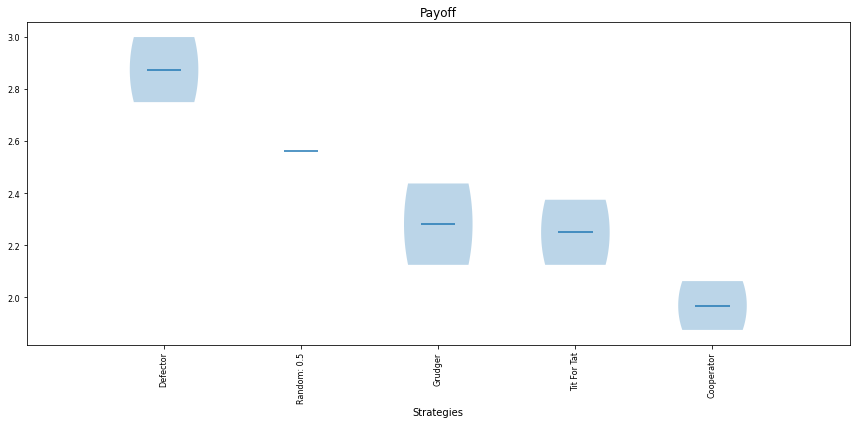

In [ ]:
# set up plot labels
_, ax = plt.subplots()
title = ax.set_title('Payoff')
xlabel = ax.set_xlabel('Strategies')
# draw the plot
p = plot.boxplot(ax=ax)

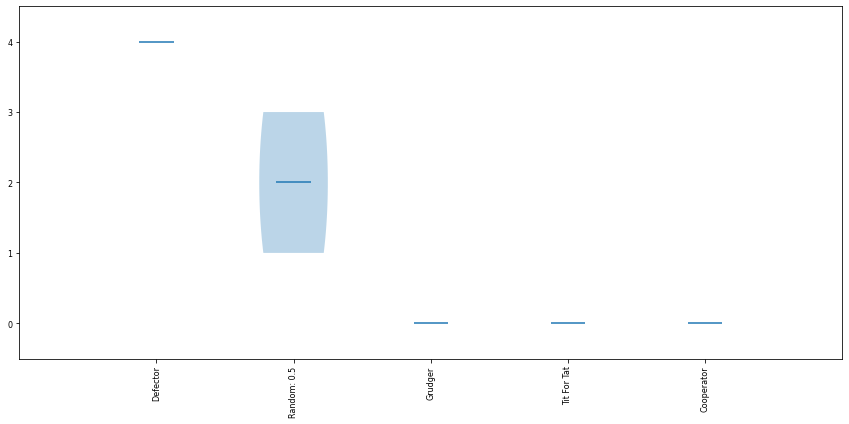

In [ ]:
# Visualising the distributions of wins
p = plot.winplot()

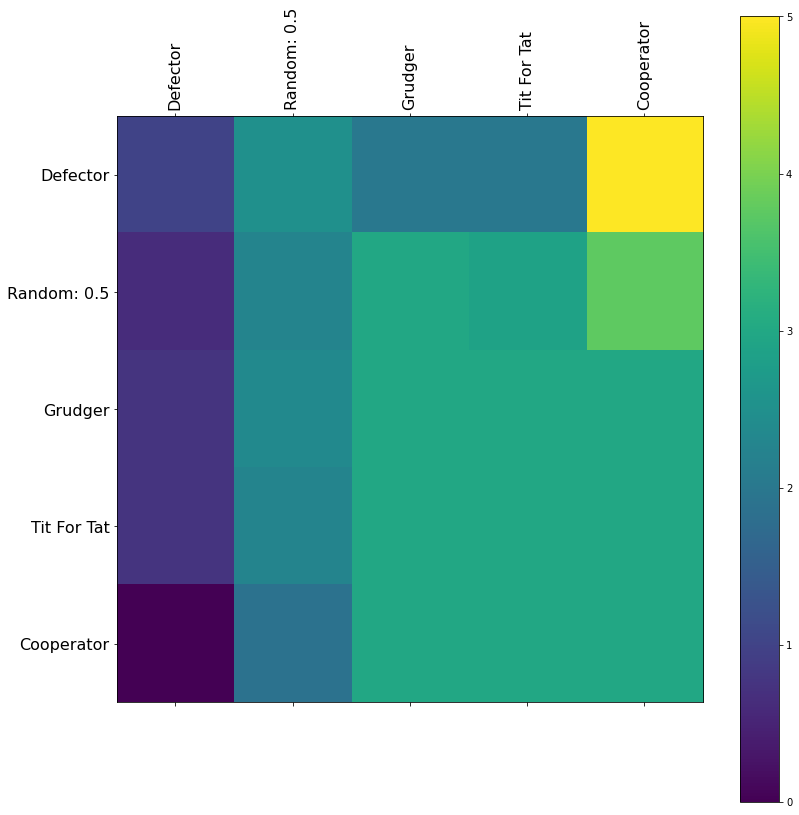

In [ ]:
# Visualising the payoff matrix
p = plot.payoff()

### Axelrod Dojo
To install axelrod dojo: <br>
>
`cd axelrod-dojo-master` <br>
`python setup.py develop` <br> 
>
You can also try: <br>
>
`pip install axelrod_dojo` <br>
>
but for me it didn't work, I recieved error, probably because I'm on python 3.10

In [ ]:
import axelrod_dojo as dojo

ModuleNotFoundError: No module named 'axelrod_dojo'